In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

### Read in data

In [2]:
train = pd.read_csv("train.csv", index_col = 0).drop(["action_taken_name",
                                                      "agency_name",
                                                      "state_name",
                                                     "as_of_year",
                                                     "sequence_number"], axis = 1)
test = pd.read_csv("test.csv", index_col = 0).drop(["action_taken_name",
                                                    "agency_name",
                                                    "state_name",
                                                   "as_of_year",
                                                   "sequence_number"], axis = 1)

C:\Python36\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Python36\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Processing and Manipulation

In [3]:
cats = ["state_abbr", "purchaser_type_name", "property_type_name", "preapproval_name",
        "owner_occupancy_name", "msamd_name", "loan_type_name", "loan_purpose_name",
        "lien_status_name", "hoepa_status_name", "denial_reason_name_1","denial_reason_name_2",
        "county_name", "co_applicant_sex_name", "co_applicant_race_name_1",
        "co_applicant_ethnicity_name", "applicant_sex_name", "applicant_race_name_1",
        "applicant_ethnicity_name", "agency_abbr", "approved", "denial_reason_name_3"]

In [6]:
temp = [elem for elem in train.columns if elem not in cats]
all_data = pd.concat([train, test])
temp

['tract_to_msamd_income',
 'rate_spread',
 'population',
 'minority_population',
 'number_of_owner_occupied_units',
 'number_of_1_to_4_family_units',
 'loan_amount_000s',
 'hud_median_family_income',
 'applicant_income_000s',
 'sequence_number',
 'census_tract_number',
 'as_of_year']

In [25]:
# min-max normalizes a column cat of dataset df
# returns that column as pandas series
def normalize(df, cat):
    xmin = df[cat].min()
    xmax = df[cat].max()
    return (df[cat] - xmin) / (xmax - xmin)

In [26]:
# Data manipulation

all_data = pd.concat([train, test])

cats = ["state_abbr", "purchaser_type_name", "property_type_name", "preapproval_name",
        "owner_occupancy_name", "msamd_name", "loan_type_name", "loan_purpose_name",
        "lien_status_name", "hoepa_status_name", "denial_reason_name_1","denial_reason_name_2",
        "county_name", "co_applicant_sex_name", "co_applicant_race_name_1",
        "co_applicant_ethnicity_name", "applicant_sex_name", "applicant_race_name_1",
        "applicant_ethnicity_name", "agency_abbr", "approved", "denial_reason_name_3"]

# normalizing numerical columns
num_cols = [elem for elem in all_data.columns if elem not in cats]
for col in num_cols:
    all_data[col] = normalize(all_data, col)

# Replacing categorical strings with integers
for cat in cats:
    all_data[cat] = pd.Categorical(all_data[cat]).codes

# Filling in all numerical NAs with -1
all_data = all_data.fillna(-1)


x = all_data.drop(["approved"], axis = 1)
y = np.ravel(all_data["approved"])

### Model

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
pred = model.predict(x_test)
print(metrics.accuracy_score(y_test, pred))
print(y_test.mean())

0.9371050263152746
0.8058902030221805


In [29]:
# class probabilities
probs = model.predict_proba(x_test)

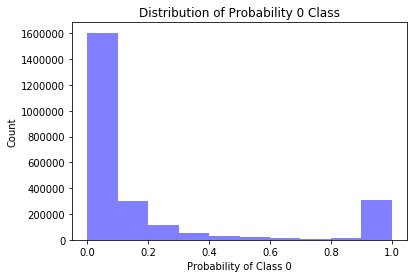

In [30]:
num_bins = 10

n, bins, patches = plt.hist(probs[:, 0], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Probability of Class 0')
plt.ylabel('Count')
plt.title('Distribution of Probability 0 Class')

plt.show()

### Cross-Validation

In [31]:
scores = cross_val_score(LogisticRegression(), x, y, cv=5, scoring='accuracy')
print(scores)

C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.93671131 0.93543525 0.93589867 0.9352628  0.93769072]
